# Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Clone Dataset

In [ ]:
! git clone https://github.com/education454/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [ ]:
base_dir = '/content/datasets/Data'

train_dir = os.path.join(base_dir, 'train')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_dir = os.path.join(base_dir, 'test')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(473).jpg', 'COVID19(27).jpg', 'COVID19(413).jpg', 'COVID19(159).jpg', 'COVID-19 (16).jpg', 'COVID19(468).jpg', 'COVID19(412).jpg', 'COVID19(280).jpg', 'COVID19(536).jpg', 'COVID19(362).jpg']
['NORMAL(126).jpg', 'NORMAL(1268).jpg', 'NORMAL(740).jpg', 'NORMAL(28).jpg', 'NORMAL(774).jpg', 'NORMAL(521).jpg', 'NORMAL(133).jpg', 'NORMAL(1080).jpg', 'NORMAL(902).jpg', 'NORMAL(1506).jpg']
['COVID-19 (371).jpg', 'COVID-19 (691).jpg', 'COVID19(396).jpg', 'COVID19(278).jpg', 'COVID19(499).jpg', 'COVID19(449).jpg', 'COVID-19 (875).jpg', 'COVID19(426).jpg', 'COVID19(35).jpg', 'COVID19(399).jpg']
['NORMAL(1098).jpg', 'NORMAL(1270).jpg', 'NORMAL(1015).jpg', 'NORMAL(1537).jpg', 'NORMAL(554).jpg', 'NORMAL(1173).jpg', 'NORMAL(394).jpg', 'NORMAL(10).jpg', 'NORMAL(1283).jpg', 'NORMAL(475).jpg']


In [ ]:
print('Train Dataset Covid Images:', len(train_covid_names))
print('Train Dataset Normal Images:', len(train_normal_names))

print('Test Dataset Covid Images:', len(test_covid_names))
print('Test Dataset Normal Images:', len(test_normal_names))

print('Total Train Images:', len(train_covid_names + train_normal_names))
print('Total Test Images:', len(test_covid_names + test_normal_names))

Train Dataset Covid Images: 545
Train Dataset Normal Images: 1266
Test Dataset Covid Images: 167
Test Dataset Normal Images: 317
Total Train Images: 1811
Total Test Images: 484


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(473).jpg', '/content/datasets/Data/train/COVID19/COVID19(27).jpg', '/content/datasets/Data/train/COVID19/COVID19(413).jpg', '/content/datasets/Data/train/COVID19/COVID19(159).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (16).jpg', '/content/datasets/Data/train/COVID19/COVID19(468).jpg', '/content/datasets/Data/train/COVID19/COVID19(412).jpg', '/content/datasets/Data/train/COVID19/COVID19(280).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(126).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1268).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(740).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(28).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(774).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(521).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(133).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1080).jpg']


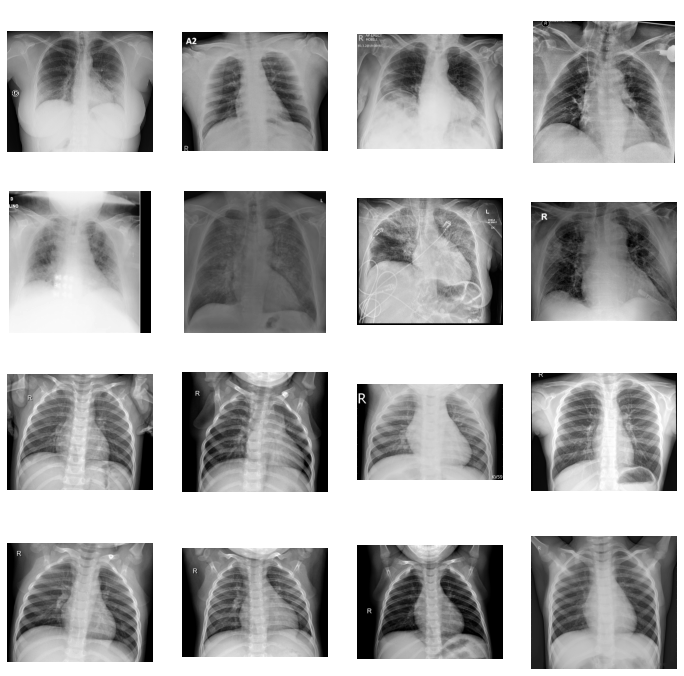

In [ ]:
# set the number of columns and rows
nrows = 4
ncols = 4

# set the figure size
fig = plt.gcf()
fig.set_size_inches(12, 12)

# get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]

# print the list
print(next_covid_pic)
print(next_normal_pic)

for i, img_path in enumerate(next_covid_pic + next_normal_pic):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=10, color='white')
  plt.imshow(img, cmap='gray')

plt.show()

# Generating Training , Validation & Testing Batches

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150),
    subset = 'training',
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    subset = 'validation',
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
from IPython.display import display

display(train_generator.class_indices)

display(test_generator.class_indices)

{'COVID19': 0, 'NORMAL': 1}

{'COVID19': 0, 'NORMAL': 1}

# Build CNN Model

In [ ]:
model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, input_shape
model.add(Conv2D(32, (5,5), padding='SAME', activation='relu', input_shape=(150, 150, 3)))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# add another conv. layer
model.add(Conv2D(64, (5,5), padding='SAME', activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer: amount of nodes, activation
model.add(Dense(256, activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))

# output layer :D
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train Model


In [ ]:
model.compile(Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/30
46/46 [==============================] - 44s 948ms/step - loss: 0.9001 - accuracy: 0.7612 - val_loss: 0.5209 - val_accuracy: 0.9094
Epoch 2/30
46/46 [==============================] - 44s 957ms/step - loss: 0.2508 - accuracy: 0.8937 - val_loss: 0.1902 - val_accuracy: 0.9500
Epoch 3/30
46/46 [==============================] - 43s 942ms/step - loss: 0.1688 - accuracy: 0.9427 - val_loss: 0.2288 - val_accuracy: 0.9656
Epoch 4/30
46/46 [==============================] - 43s 945ms/step - loss: 0.1722 - accuracy: 0.9476 - val_loss: 0.2132 - val_accuracy: 0.9469
Epoch 5/30
46/46 [==============================] - 44s 946ms/step - loss: 0.1568 - accuracy: 0.9469 - val_loss: 0.1197 - val_accuracy: 0.9563
Epoch 6/30
46/46 [==============================] - 44s 953ms/step - loss: 0.1367 - accuracy: 0.9503 - val_loss: 0.1302 - val_accuracy: 0.9594
Epoch 7/30
46/46 [==============================] - 44s 946ms/step - loss: 0.1356 - accuracy: 0.9600 - val_loss: 0.1594 - val_accuracy: 0.9563

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

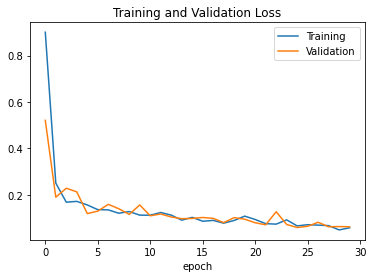

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

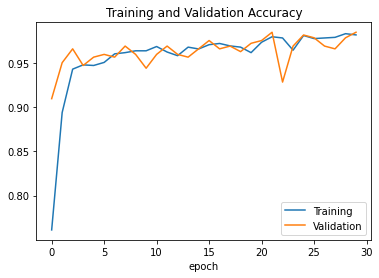

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

16/16 [==============================] - 9s 560ms/step - loss: 0.0787 - accuracy: 0.9793
Test Loss: 0.07870075106620789
Test Accuracy: 0.9793388247489929


In [ ]:
# test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

Saving NORMAL(1015).jpg to NORMAL(1015).jpg
Saving COVID-19 (872).jpg to COVID-19 (872) (1).jpg
/content/NORMAL(1015).jpg
NORMAL(1015).jpg
Normal
/content/COVID-19 (872).jpg
COVID-19 (872).jpg
Covid19


In [ ]:
model.save('covid19_classification.h5')

In [ ]:
from google.colab import files
files.download('covid19_classification.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>